In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Components in matplotlib

In [141]:
fig = plt.figure()
fig.suptitle('No axes on this figure')
plt.show() 
# without axes object, nothing will be shown

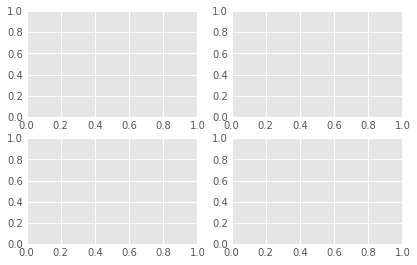

In [142]:
fig, ax_lst = plt.subplots(2,2)
plt.show()

In [157]:
plt.figure?

# Coding style

## 1. MATLAB STYPLE 
uses plt.subplot() and plt.plot() a lot

In [161]:
p1 = np.arange(0.0, 30.0, 0.1)

### 1.1 plot separately

/Users/Shawn_Ma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


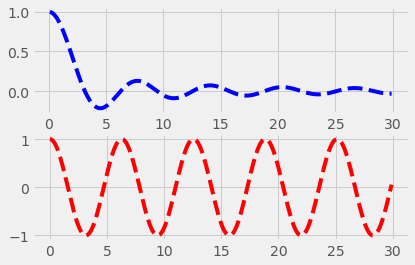

In [164]:
plt.subplot(211)
plt.plot(p1, np.sin(p1)/p1, 'b--')
plt.subplot(212)
plt.plot(p1, np.cos(p1), 'r--')
plt.show()

### 1.2 plot on the same axes

/Users/Shawn_Ma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


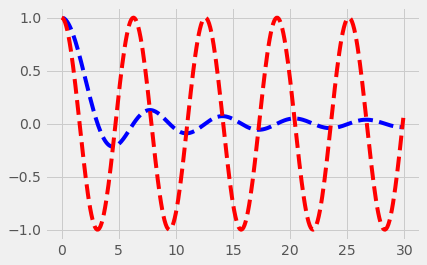

In [162]:
# fig = plt.figure(num=1) # not necessary, because
plt.plot(p1, np.sin(p1)/p1, 'b--')
plt.plot(p1, np.cos(p1), 'r--')
plt.show()

or, use plot(x1,y1,x2,y2)

/Users/Shawn_Ma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


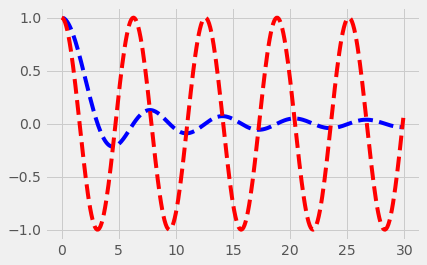

In [205]:
# fig = plt.figure(num=1) # not necessary, because
plt.plot(p1, np.sin(p1)/p1, 'b--',p1, np.cos(p1), 'r--')
plt.show()

In [207]:
# get current figure and current axes
plt.gcf(), plt.gca()

(<matplotlib.figure.Figure at 0x11c5cbd50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11cc63950>)

## 2. using plt.subplots()

### 2.1 creates just a plot

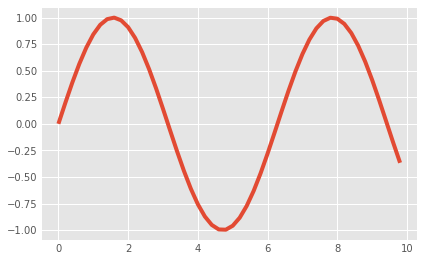

In [119]:
x = np.arange(0,10,0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)
plt.show()

### 2.2 unpack output axes array

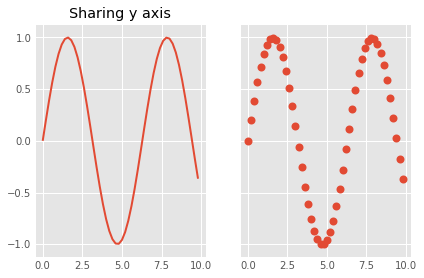

In [139]:
fig , (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.plot(x,y, lw=2)
ax1.set_title('Sharing y axis')
ax2.scatter(x,y,linewidths=2)
plt.show()

### 2.3 create multiple plots and access them through array

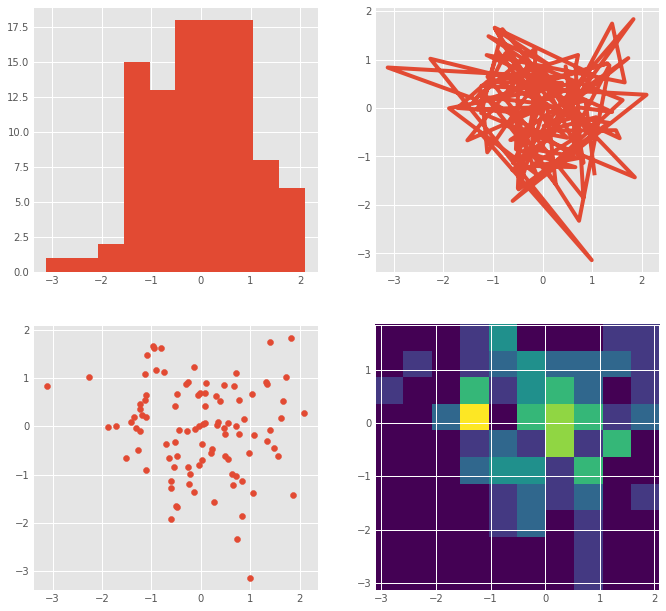

In [135]:
np.random.seed(19680801)
data = np.random.randn(2, 100)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])
plt.show()

# Set line properties 

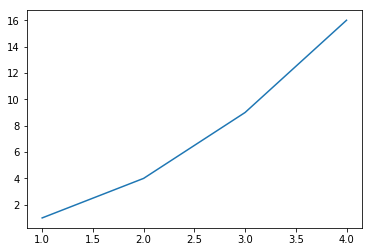

In [3]:
plt.plot([1,2,3,4], [1,4,9,16])
plt.show()

## 1. use keyword args

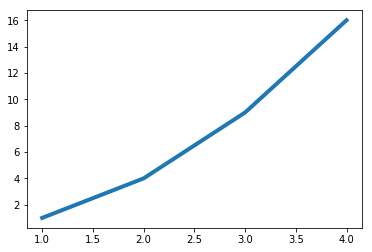

In [4]:
plt.plot([1,2,3,4], [1,4,9,16], linewidth =4)
plt.show()

## 2. use setter methods 

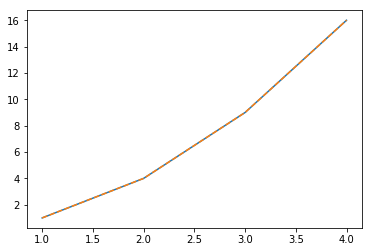

In [9]:
line,= plt.plot([1,2,3,4], [1,4,9,16])  # what's , for? 
line.set_linestyle('--')
plt.show()

## 3.use setp() to set multiple properties

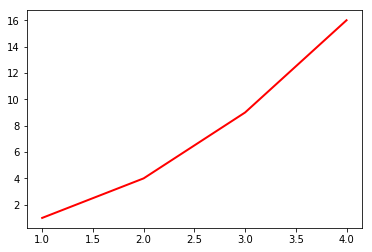

In [10]:
line,= plt.plot([1,2,3,4], [1,4,9,16])  
plt.setp(line, color='r', linewidth=2.0) 
plt.show()

# Playing with text 

In [19]:
n = np.random.random_sample((5,))

In [24]:
np.random.random_sample?

## 1. add text anywhere

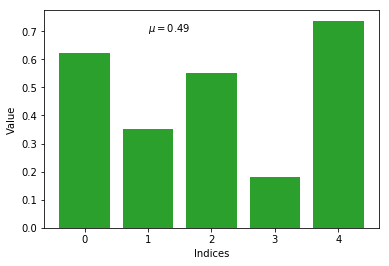

In [23]:
plt.bar(np.arange(len(n)), n)
plt.xlabel('Indices')
plt.ylabel('Value')
plt.text(1, .7, r'$\mu=' + str(np.round(np.mean(n), 2)) + ' $') # add text within the plot
# 1 is the x value, 0.7 is the y value, third arg is the text needs to be displayed
# here , the author used Latex expression
plt.show()

## 2. add annotation

In [25]:
ax = plt.subplot(111)

In [26]:
t = np.arange(0.0, 5.0, 0.01)

In [27]:
s = np.cos(2*np.pi*t)

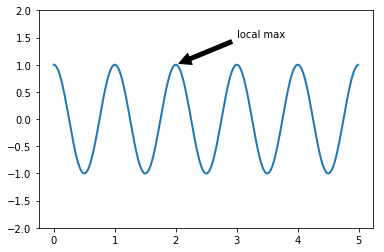

In [40]:
line , = plt.plot(t,s, lw=2)

plt.annotate('local max', xy=(2,1), xytext=(3, 1.5), \
            arrowprops = dict(facecolor='black', shrink=0.05),)b
plt.ylim(-2,2)
plt.show()

# Styling your plots 

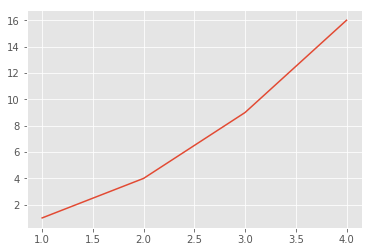

In [41]:
plt.style.use('ggplot')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

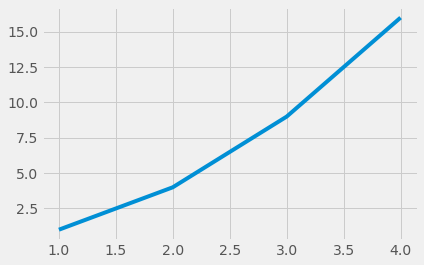

In [42]:
plt.style.use('fivethirtyeight')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

In [48]:
plt.style.context?

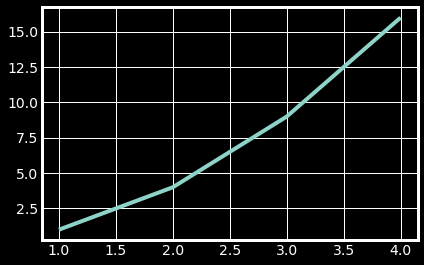

In [45]:
# set particular graph temporarily
with plt.style.context(('dark_background')):
    plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

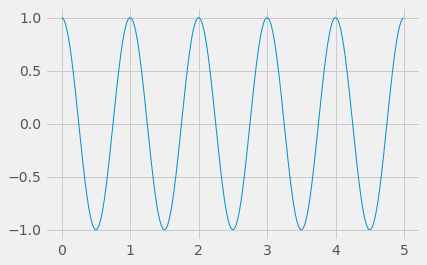

In [56]:
# plt.style.use() is a global setting function
plt.plot(t,s, lw=1)
plt.show()

# Box plot 

In [52]:
np.random.seed(10)
box_data_1 = np.random.normal(100,10,200)
box_data_2 = np.random.normal(80,30,200)
box_data_3 = np.random.normal(90,20,200)

In [53]:
data_to_plot = [box_data_1, box_data_2, box_data_3]

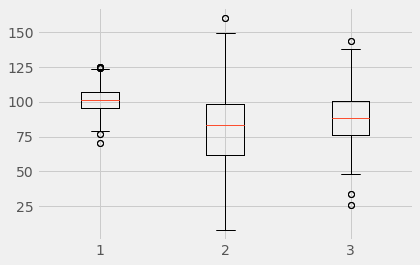

In [55]:
bp = plt.boxplot(data_to_plot)
plt.show()

In [58]:
# bp is a python dict
bp.keys()

['boxes', 'fliers', 'medians', 'means', 'whiskers', 'caps']

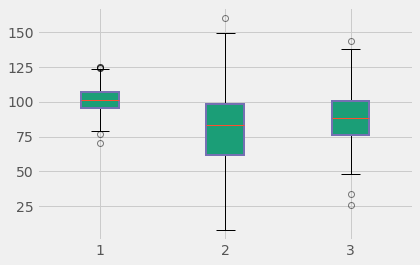

In [68]:
# set tyle for different properties in boxplot
bp = plt.boxplot(data_to_plot, patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set(color ='#7570b3', lw =2)
    # change fill color
    box.set( facecolor = '#1b9e77')
    
for flier in bp['fliers']:
    flier.set(marker='o', color ='#e7298a', alpha=0.5)
    
plt.show()

# Scatter plot 

## 1. scatter plot with histograms

In [69]:
from matplotlib.ticker import NullFormatter

In [70]:
x = np.random.randn(1000)
y = np.random.randn(1000)

In [71]:
nullfmt = NullFormatter() # to eliminate x, y labels of the histograms

In [76]:
# set axes properties
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

In [74]:
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

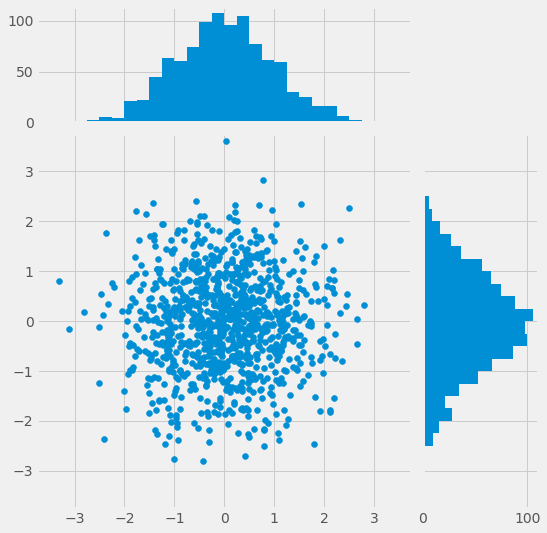

In [93]:
plt.figure(1, figsize=(8,8))
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# eliminate label on x axis for histogram
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot
axScatter.scatter(x, y)
# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] ) # absolute max value in x and y
lim = ( int(xymax/binwidth) + 1) * binwidth 
axScatter.set_xlim( (-lim, lim) )
axScatter.set_ylim( (-lim, lim) )
# axScatter.set_xlim( (-5, 5) )
# axScatter.set_ylim( (-5, 5) )

# create a list of interval values, which will be used for histograms
bins = np.arange(-lim, lim + binwidth, binwidth)
# bins = np.arange(-lim, lim, binwidth)
axHistx.hist(x, bins = bins)
axHisty.hist(y, bins = bins, orientation='horizontal')

axHistx.set_xlim( axScatter.get_xlim())
axHisty.set_ylim( axScatter.get_ylim())
plt.show()

## 2. Bubble charts 
basically scatter plot with additional dimension:
<br>
color, size

In [153]:
plt.style.use('fivethirtyeight')

In [91]:
df = pd.DataFrame(np.random.rand(50,3), columns = ['a', 'b', 'c'])
df['d'] = np.round(df['c']*10)
df[:10]

,a,b,c,d
0,0.363674,0.041848,0.742614,7.0
1,0.443854,0.894237,0.859899,9.0
2,0.158943,0.044918,0.279999,3.0
3,0.279524,0.105940,0.302152,3.0
4,0.977227,0.521579,0.206112,2.0
5,0.239603,0.942123,0.851252,9.0
6,0.604343,0.981343,0.480682,5.0
7,0.908630,0.611949,0.210473,2.0
8,0.776097,0.615106,0.227558,2.0
9,0.850721,0.277668,0.631749,6.0


In [149]:
df.describe()

,a,b,c,d
count,50.000000,50.000000,50.000000,50.000000
mean,0.549855,0.482038,0.504002,5.080000
std,0.299042,0.308788,0.264187,2.724342
min,0.029451,0.001127,0.041173,0.000000
25%,0.299956,0.251556,0.297457,3.000000
50%,0.552832,0.428126,0.540310,5.000000
75%,0.795947,0.748418,0.722995,7.000000
max,0.982842,0.972403,0.984677,10.000000


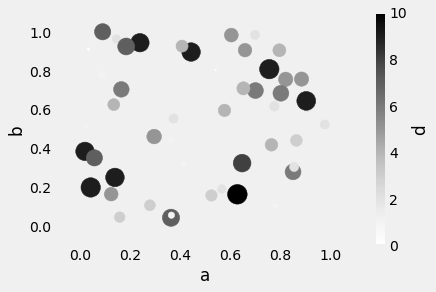

In [99]:
pandas_ax = df.plot(kind='scatter', x='a', y='b', s=df['c']*400,c='d', ylim=[-0.1,1.1], xlim=[-0.1,1.1])
pandas_ax.grid(b=0)

# The lifecycle of a Plot
A tutorial aims to show the beginning, the middle and end of a single visualization using matplotlib.
And put all APIs introduced before together.

In [11]:
%matplotlib inline

In [2]:
from matplotlib.ticker import FuncFormatter

In [64]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}

In [65]:
group_data = list(data.values())
group_names = list(data.keys())
group_means = np.mean(group_data)

### plot with default configuration 

<Container object of 10 artists>

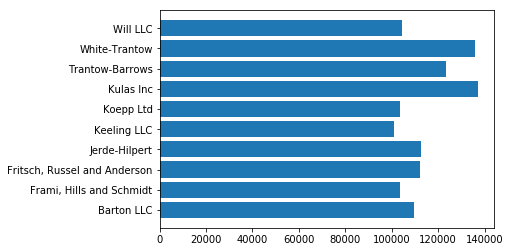

In [15]:
fig, ax = plt.subplots()
ax.barh(group_names,group_data)

In [16]:
print plt.style.available

[u'seaborn-darkgrid', u'Solarize_Light2', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'fast', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


### add styles

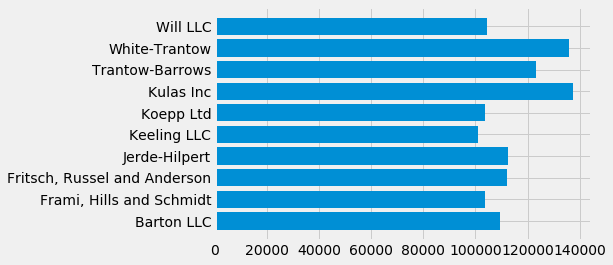

In [29]:
# fig, ax = plt.subplots()
# 如果用api style，temporiry formatting doesn't work
with plt.style.context(('fivethirtyeight')):
    plt.barh(group_names,group_data)
plt.show()

In [30]:
plt.style.use('fivethirtyeight')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

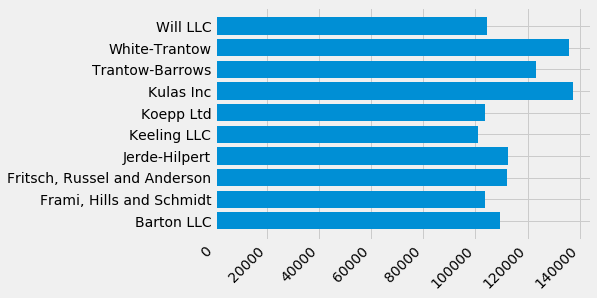

In [37]:
fig, ax = plt.subplots()
ax.barh(group_names,group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment = 'right')

In [42]:
import sys

[Text(0,0.5,u'Company'),
 (-10000, 140000),
 Text(0.5,0,u'Total Revenues'),
 Text(0.5,1,u'Company Revenue')]

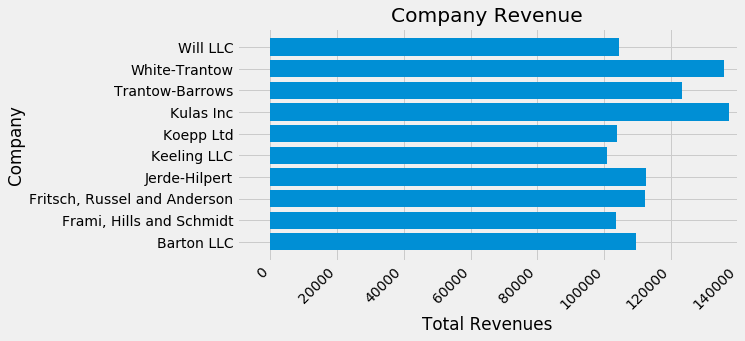

In [51]:
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(group_names,group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment = 'right')
ax.set(xlim=[-10000,140000], xlabel='Total Revenues', ylabel='Company', title='Company Revenue')

### custimize the xtick formats

In [68]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6) # 小数点后保留1位
    else:
        s = '${:1.0f}K'.format(x*1e-3) # 小数点后保留0位
    return s

formatter = FuncFormatter(currency)

In [57]:
formatter

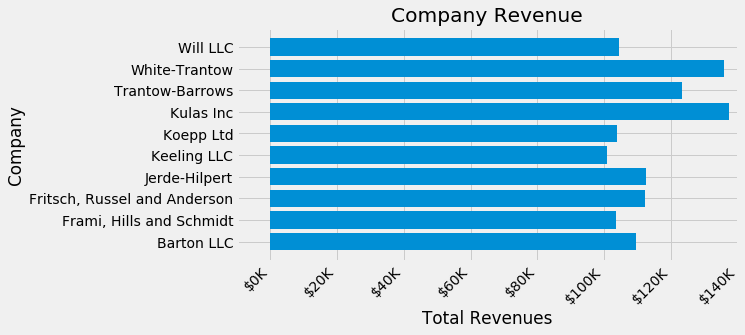

In [70]:
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(group_names,group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment = 'right')
ax.set(xlim=[-10000,140000], xlabel='Total Revenues', ylabel='Company', title='Company Revenue')
# ax.set( xlabel='Total Revenues', ylabel='Company', title='Company Revenue')

ax.xaxis.set_major_formatter(formatter)

### add more elements to axes

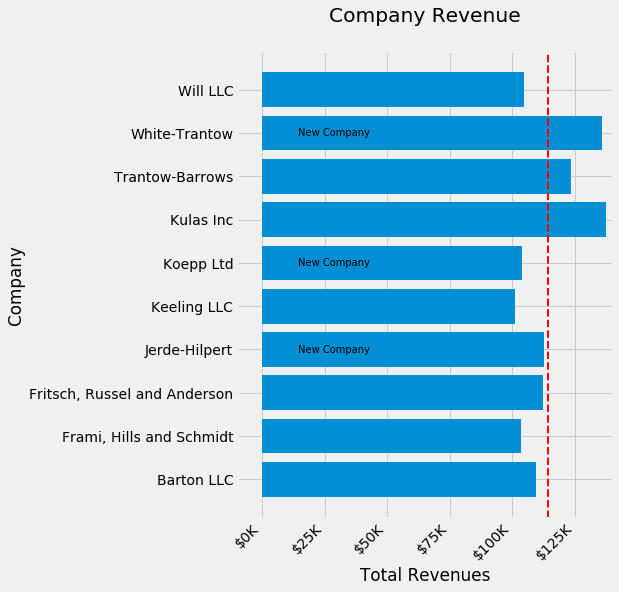

In [85]:
fig, ax = plt.subplots(figsize=(6,8))
ax.barh(group_names,group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment = 'right')
ax.set(xlim=[-10000,140000], xlabel='Total Revenues', ylabel='Company', title='Company Revenue')
# ax.set( xlabel='Total Revenues', ylabel='Company', title='Company Revenue')


# Add a vertical lines across the axes
ax.axvline(group_means, ls='--', color='r', lw=2)

# Annotate new companies
for group in [3,5,8]:
    ax.text(14500, group, "New Company", fontsize=10, verticalalignment='center')
    
# Move the title up a little bit
ax.title.set(y=1.05)

# Change xtick labels
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
ax.xaxis.set_major_formatter(formatter)
# ax.set_xticklabels(['low','med','high'])


### Saving the plot

In [87]:
print fig.canvas.get_supported_filetypes()

{u'pgf': u'PGF code for LaTeX', u'svgz': u'Scalable Vector Graphics', u'tiff': u'Tagged Image File Format', u'jpg': u'Joint Photographic Experts Group', u'raw': u'Raw RGBA bitmap', u'jpeg': u'Joint Photographic Experts Group', u'png': u'Portable Network Graphics', u'ps': u'Postscript', u'svg': u'Scalable Vector Graphics', u'eps': u'Encapsulated Postscript', u'rgba': u'Raw RGBA bitmap', u'pdf': u'Portable Document Format', u'tif': u'Tagged Image File Format'}


* `transparent=True` makes the background of the saved figure transparent if the format supports it.
* `dpi=80` controls the resolution (dots per square inch) of the output.
* `bbox_inches="tight"` fits the bounds of the figure to our plot.

In [88]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches='tight')

In [89]:
fig.savefig('sales_1.png', transparent=False, dpi=200, bbox_inches='tight')